In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [6]:
data.shape

(1599, 13)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
data['Alcohol_content'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [10]:
ord_enc=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [11]:
data['Alcohol_content']=df1
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0.0,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1.0,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1.0,5


# Heat MAp


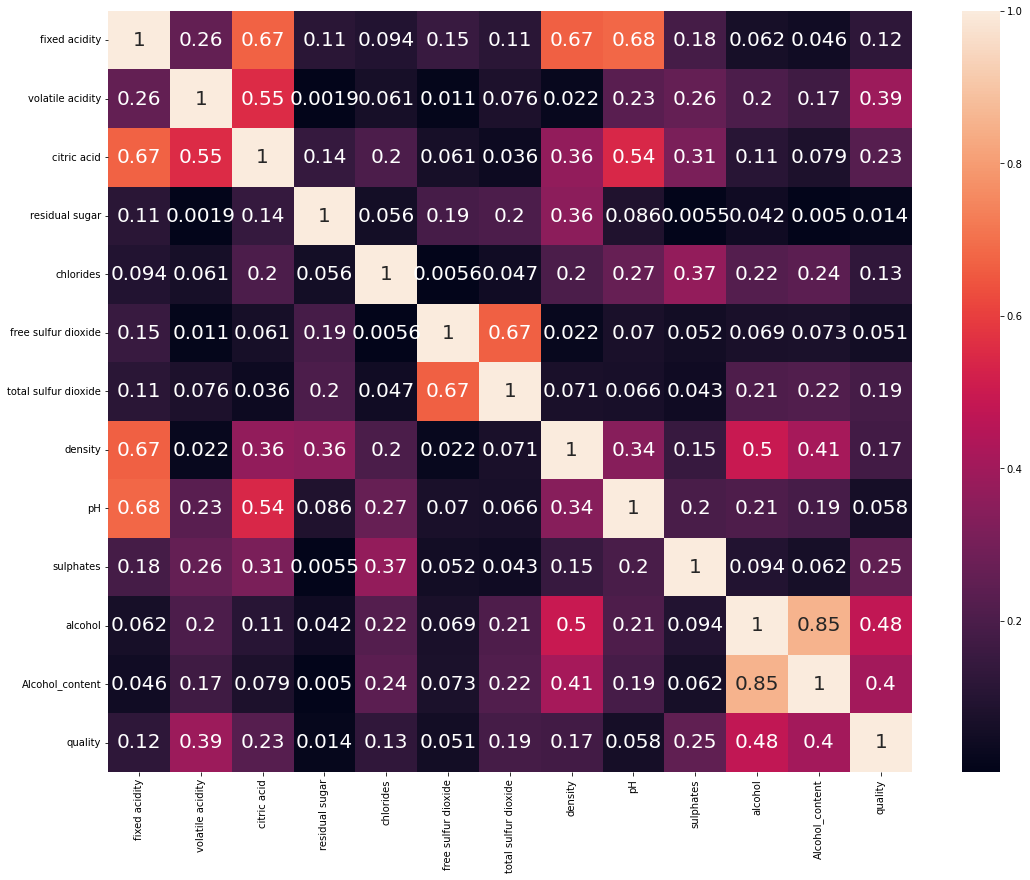

In [12]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20})
plt.show()

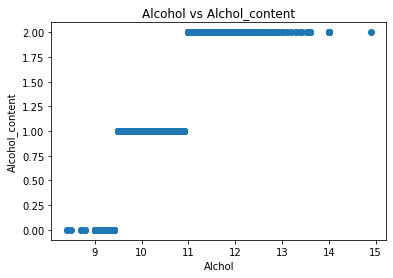

In [14]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alchol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alchol_content')
plt.show()

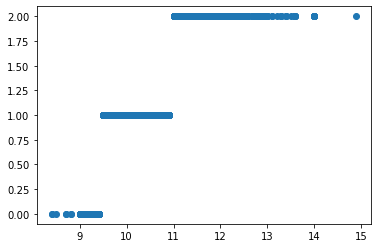

In [13]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.show()

In [15]:
X=data.drop(columns=['quality','Alcohol_content'])
y=data['quality']

In [16]:
x_train,x_test,y_train,y_test=train_test_split=train_test_split(X,y,test_size=0.25,random_state=41)


In [17]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
clf.score(x_train,y_train)

1.0

In [19]:
clf.score(x_test,y_test)

0.6325

In [20]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6325

In [21]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(5,10)}


In [22]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,n_jobs=-1) #use all the cores in your system.for performance improvement


In [23]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [24]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [30]:
clf=DecisionTreeClassifier(criterion = 'entropy',
                           max_depth= 10,
                          
                          min_samples_leaf= 2,
                           min_samples_split= 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3)

In [31]:
clf.score(x_train,y_train)

0.8765638031693077

In [32]:
clf.score(x_test,y_test)

0.56

In [33]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.56

In [34]:
y_test

635     5
581     5
206     7
547     6
1515    6
       ..
199     4
61      5
766     5
1024    7
1023    6
Name: quality, Length: 400, dtype: int64

In [35]:
clf=DecisionTreeClassifier(criterion = 'gini',
                           max_depth= 10,
                          
                          min_samples_leaf= 2,
                           min_samples_split= 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [36]:
clf.score(x_train,y_train)

0.8340283569641368

In [37]:
clf.score(x_test,y_test)

0.6175

In [38]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6175

In [39]:
y_test

635     5
581     5
206     7
547     6
1515    6
       ..
199     4
61      5
766     5
1024    7
1023    6
Name: quality, Length: 400, dtype: int64

# Bagging Classifier 

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
X=dataset.data #only features
y=dataset.target #Only labels 

In [50]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [51]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8951048951048951

In [45]:
#lets use bagging over KNN classifier and see if our score improves
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                         n_estimators=9,max_samples=0.7,
                         bootstrap=True, random_state=3,oob_score=True)#max_samples= training data 
#oob_score= testing score 

In [46]:
bag_knn.fit(X_train,y_train)
bag_knn.score(X_test,y_test)

0.9020979020979021

In [55]:
#without bagging
pasting_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                         n_estimators=9,max_samples=0.7,
                         bootstrap=False, random_state=3)

In [56]:
pasting_knn.fit(X_train,y_train)
pasting_knn.score(X_test,y_test)

0.8881118881118881

# Random forest

In [57]:
#imp lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing Normalizing
from sklearn.preprocessing import StandardScaler

#models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
data=pd.read_csv("http://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv" ,sep =";")

In [60]:
data.head() #1 = -ve 0=+ve

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [61]:
df=data

In [62]:
df.shape

(69301, 13)

In [64]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [63]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
#remove duplicates
df.drop('id',axis=1,inplace=True)

df.drop_duplicates(inplace=True)

In [66]:
df.shape

(69277, 12)

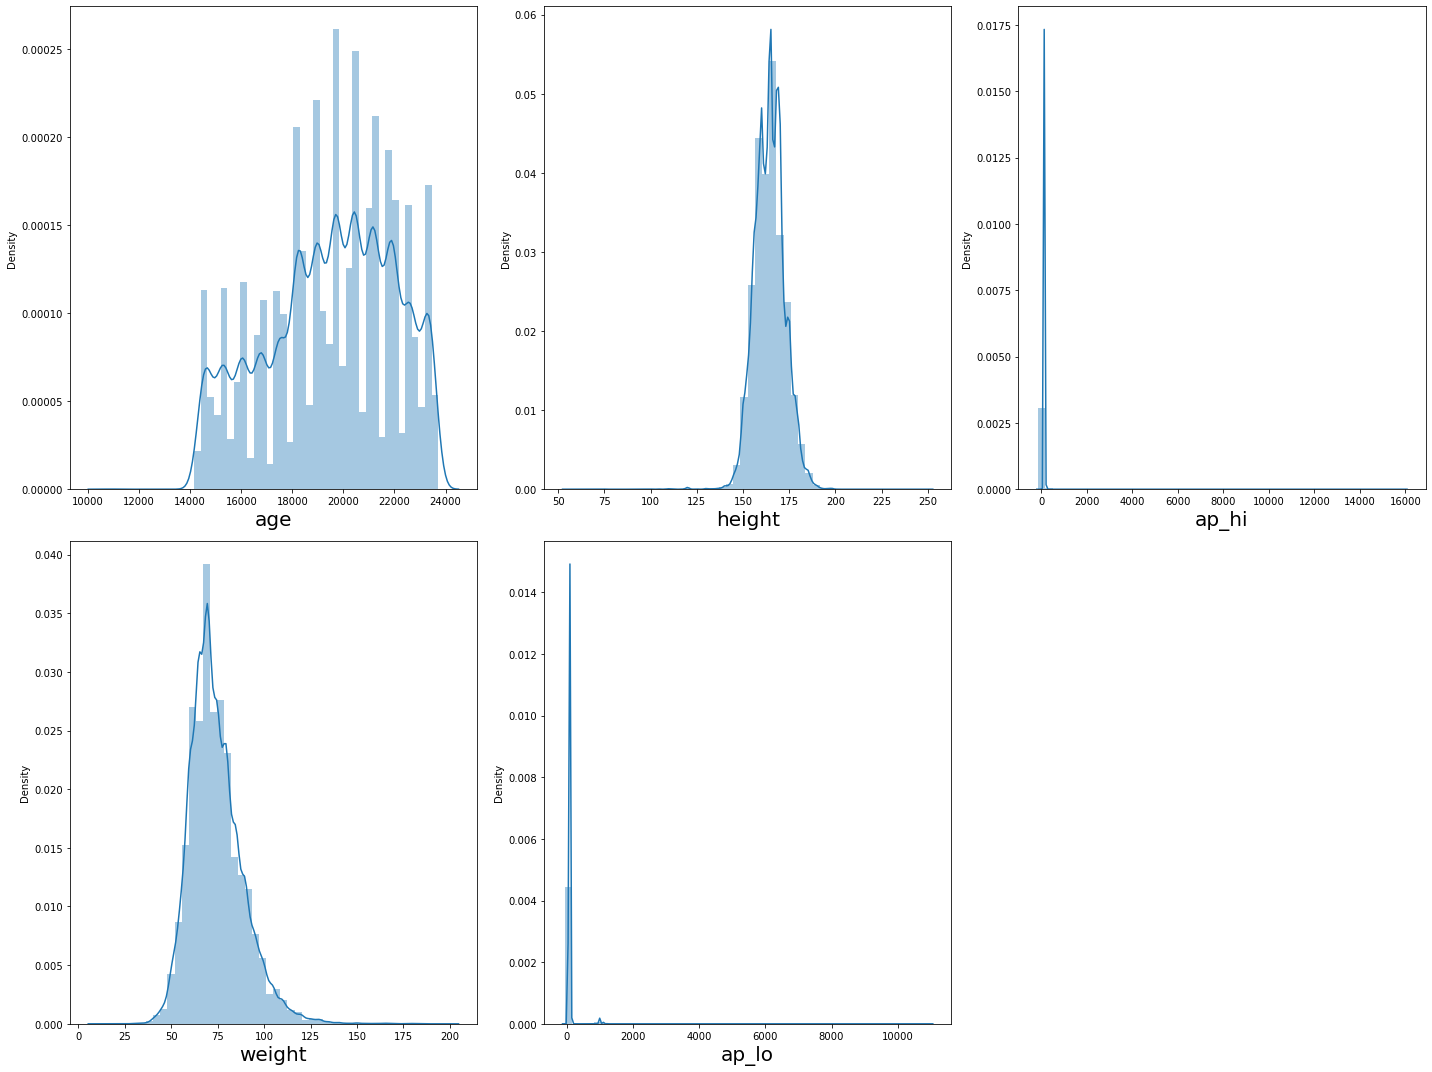

In [67]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Z Distrubution
#to remove skewed data

it converts normal dist to standard normal distribution

keeping mean data in the centre

1 standard deviation covers 99.7%

2 standard deviation covers 95.4%

3 standard deviation covers 68.3% (best SD)

In [74]:
from scipy.stats import zscore
z_score= zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [76]:
corr=df.corr()
corr.shape

(12, 12)

In [77]:
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022045,-0.085378,0.065995,0.197944,0.148254,0.156439,0.099565,-0.046993,-0.027934,-0.010903,0.242072
gender,-0.022045,1.000000,0.522695,0.162730,0.055880,0.063864,-0.037540,-0.022331,0.337962,0.169748,0.006757,0.006616
height,-0.085378,0.522695,1.000000,0.313691,0.010824,0.030346,-0.059169,-0.022304,0.195106,0.096093,-0.007530,-0.016170
weight,0.065995,0.162730,0.313691,1.000000,0.244744,0.232403,0.137289,0.098920,0.065924,0.067333,-0.016955,0.178916
ap_hi,0.197944,0.055880,0.010824,0.244744,1.000000,0.606951,0.181538,0.084840,0.027299,0.030089,0.002438,0.395597
ap_lo,0.148254,0.063864,0.030346,0.232403,0.606951,1.000000,0.147674,0.070334,0.022587,0.039711,-0.000822,0.315070
cholesterol,0.156439,-0.037540,-0.059169,0.137289,0.181538,0.147674,1.000000,0.449849,0.008911,0.034926,0.009096,0.220632
gluc,0.099565,-0.022331,-0.022304,0.098920,0.084840,0.070334,0.449849,1.000000,-0.007265,0.009354,-0.008567,0.088703
smoke,-0.046993,0.337962,0.195106,0.065924,0.027299,0.022587,0.008911,-0.007265,1.000000,0.340542,0.026781,-0.016877
alco,-0.027934,0.169748,0.096093,0.067333,0.030089,0.039711,0.034926,0.009354,0.340542,1.000000,0.026078,-0.008291


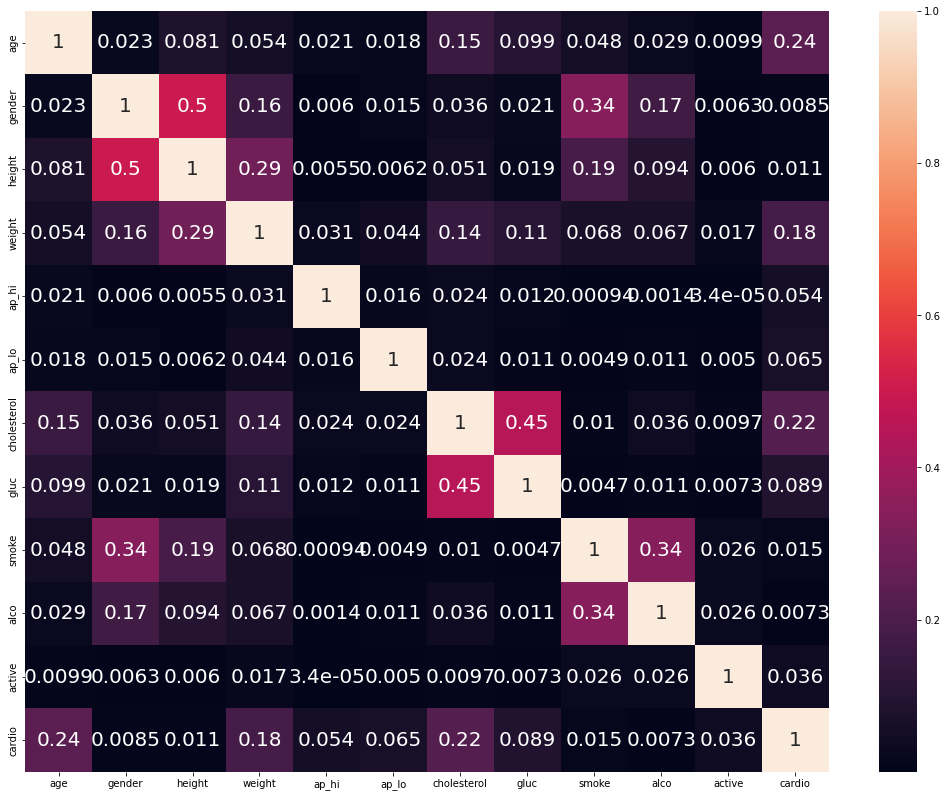

In [79]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20})
plt.show()

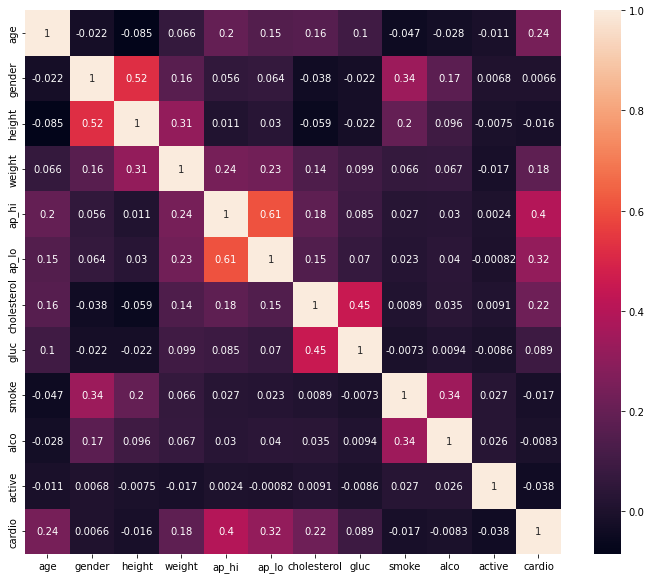

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

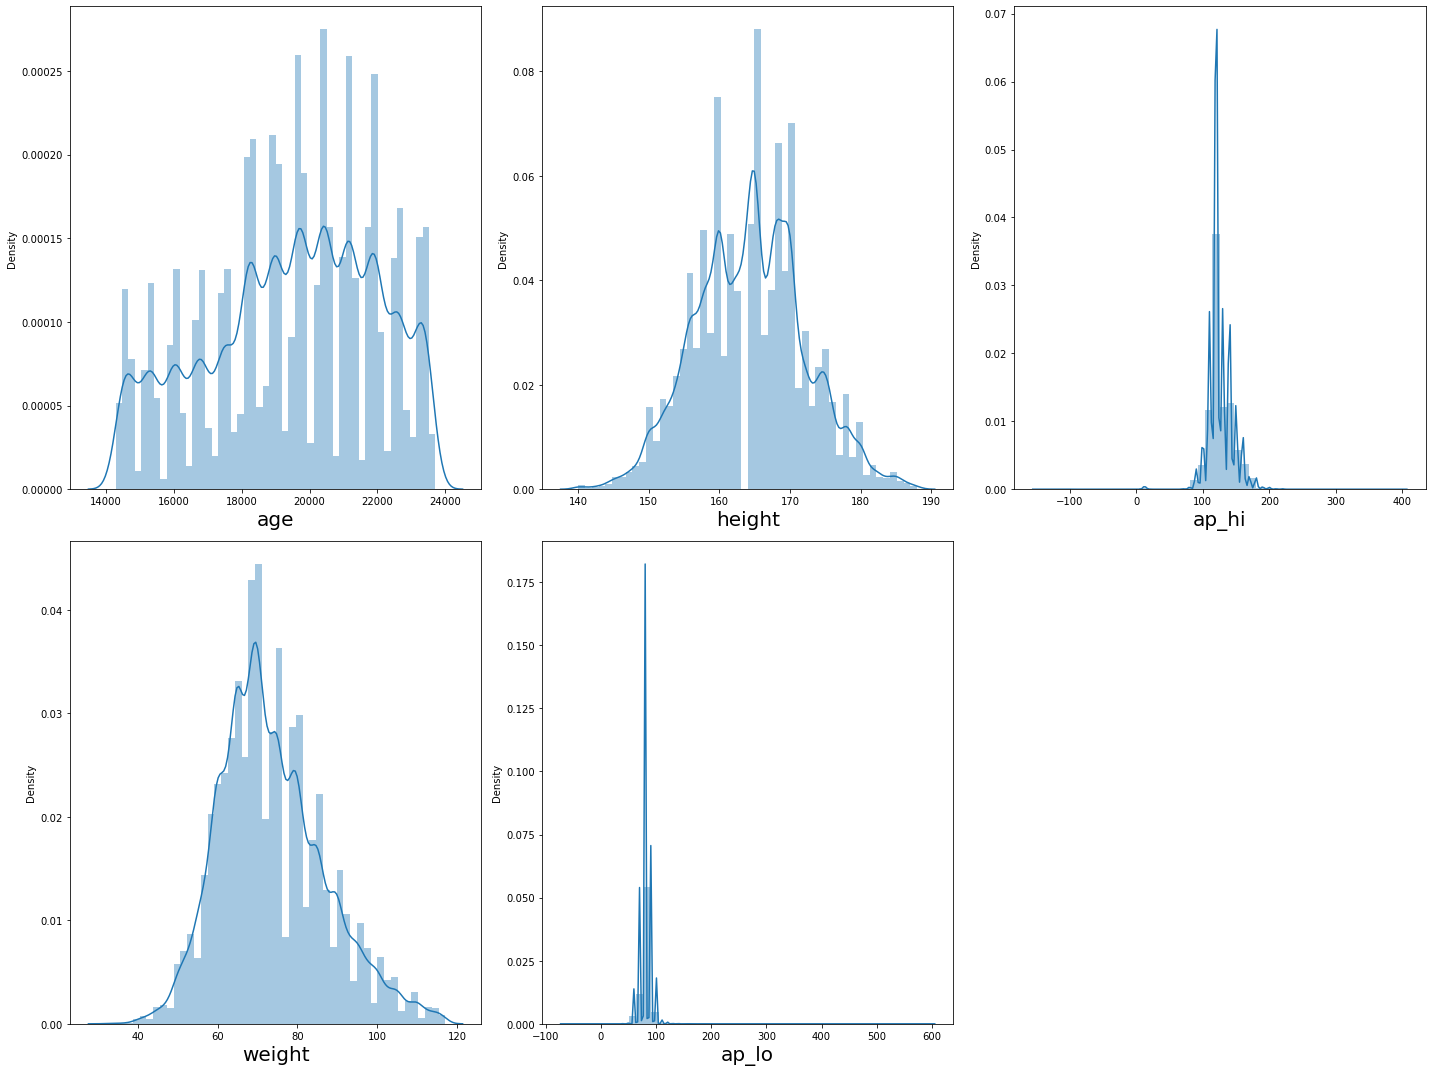

In [81]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [83]:
X=df.drop(columns=['cardio'],axis=1)
y=df['cardio']

In [88]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=.30,random_state=41)
clf=RandomForestClassifier()
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,15],
       'min_samples_leaf':[5,6]}
grd=GridSearchCV(clf,param_grid=params)
grd.fit(X_train,Y_train)
print('best params= ', grd.best_params_)

best params=  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 15}


In [89]:
clf=grd.best_estimator_
clf.fit(X_train,Y_train)
y_pred=clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

print(rf_conf_mat)
print(accuracy_score(y_test,y_pred))

[[8227 2016]
 [3374 6591]]
0.7332739509105305


In [92]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10243
           1       0.77      0.66      0.71      9965

    accuracy                           0.73     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.74      0.73      0.73     20208



In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

In [95]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [96]:
#train test 
X=df.drop(columns=['cardio'],axis=1)
y=df['cardio']
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=.25,random_state=41)

In [98]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [99]:
lr.fit(x_test,y_test)
dt.fit(x_test,y_test)
rf.fit(x_test,y_test)
kn.fit(x_test,y_test)

KNeighborsClassifier()

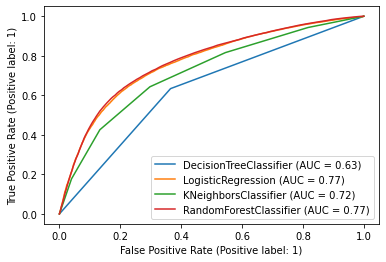

In [103]:
disp=plot_roc_curve(dt,X_train,Y_train)
plot_roc_curve(lr,X_train,Y_train,ax=disp.ax_)
plot_roc_curve(kn,X_train,Y_train,ax=disp.ax_)
plot_roc_curve(rf,X_train,Y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

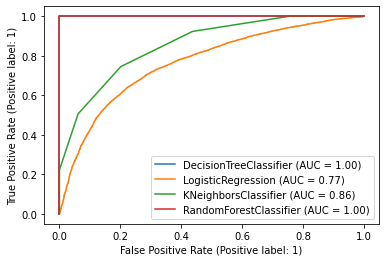

In [104]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np